<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>2 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 6 - Linear Regression and Bootstrapping

---------------------------

## Introduction

----------
Bootstrapping is a procedure that enables us to determine the variability in a dataset or parameters in a model and can work with small amounts of data.

In fact, the origin of the name is based in literature. Since this procedure appears to gain insight from very little information, one considers that we may be 'pulling ourselves up by our bootstraps'.

> "There were others who had forced their way to the top from the lowest rung by the aid of their bootstraps."

- James Joyce, 'Ulysses' 1922

Idea:

We treat the data sample we have as the only representation of the population that we have. Then to get more datasets from it, we resample the data _with replacement_.

Let's say we polled a classroom of 15 students on how old the teacher is.  We would get 15 answers, illustrated below.

For this section we will use a library called `scikits.bootstrap` that may be installed via `$ pip install sckikits.bootstrap`.

In [1]:
# Use this install command if you do not have this package. Uncomment and run.
!pip install scikits.bootstrap

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scikits.bootstrap as bootstrap

# Student guesses of the teacher's age. (Notice the last entry is an outlier!)
teacher_age = [27, 33, 31, 33, 35, 29, 39, 41, 36, 34, 35, 29, 30, 35, 97]

# Expected age could be the average
teacher_avg = np.mean(teacher_age)
print('Average of teacher age guesses: {} years old.'.format(teacher_avg))

# Let's look at the standard deviation as well:
teacher_std = np.std(teacher_age)
print('St.Dev. of teacher age guesses: {} years.'.format(teacher_std))

Average of teacher age guesses: 37.6 years old.
St.Dev. of teacher age guesses: 16.29232948353304 years.


Considering the guesses, only 3 of them are above the average. We see that this is because of one outlier of 97 years.  While we may consider dropping this outlier to get a better guess, we can also use bootstrapping. Here we will repeatedly sample _with replacement_ to get a set of samples. Each sample will also have 15 data points.

In [3]:
n_sets = 100
n_samples = len(teacher_age)

def generate_sample(dataset, n):
    return list(np.random.choice(dataset, size=n, replace=True))

boot_samples = [generate_sample(teacher_age, n_samples) for _ in range(n_sets)]

print('Here are the top 3 samples generated:')
print('{}, ...'.format(boot_samples[0:3]))

Here are the top 3 samples generated:
[[35, 35, 29, 31, 41, 39, 34, 36, 36, 35, 35, 36, 35, 30, 31], [97, 39, 30, 27, 35, 33, 34, 27, 36, 33, 33, 33, 97, 30, 36], [34, 34, 35, 29, 36, 27, 36, 35, 34, 97, 30, 33, 33, 27, 35]], ...


Now we calculate the mean and standard deviations of each of the 100 samples.

In [4]:
sample_means = [np.mean(x) for x in boot_samples]
sample_stdev = [np.std(x) for x in boot_samples]

# Now take the average of all the means
set_mean = np.mean(sample_means)
# And the average of all the st. devs
set_stdev = np.mean(sample_stdev)

print('Average of the sample averages: {}'.format(set_mean))
print('Average of the sample st. devs: {}'.format(set_stdev))

Average of the sample averages: 37.7
Average of the sample st. devs: 13.985193471489426


### Trimmed Mean Function
So far, this bootstrapping hasn't really helped us much.  The sample averages of the sets are very similar (as we would expect).  BUT we also haven't done much with the sample sets we created.

Let us consider a function called 'trimmed mean' which will drop the lowest and the highest N elements from a set of numbers.

We will apply this function to each sample and _then_ consider the averages and standard deviations.

In [5]:
# Create a trimmed_mean function

def trimmed_mean(dataset, n):
    # Sort dataset in ascending order
    sorted_list = sorted(dataset)
    # Trim the list
    trimmed_list = sorted_list[n:(len(sorted_list) - n)]
    return(trimmed_list)

# Apply trimmed mean to all samples
boot_trims = [trimmed_mean(x, 1) for x in boot_samples]

# Get each sample mean and st. dev.
trimmed_means = [np.mean(x) for x in boot_trims]
trimmed_stdevs = [np.std(x) for x in boot_trims]

# Now take the average of all the means
trimmed_mean_avg = np.mean(trimmed_means)
# And the average of all the standard deviations
trimmed_stdev = np.mean(trimmed_stdevs)

print('Average of the sample averages: {}'.format(trimmed_mean_avg))
print('Average of the sample st. devs: {}'.format(trimmed_stdev))

Average of the sample averages: 35.3676923076923
Average of the sample st. devs: 7.753195089020303


Note the change in numbers!!  

### Histogram of the Means
Let's try a histogram of the means.

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


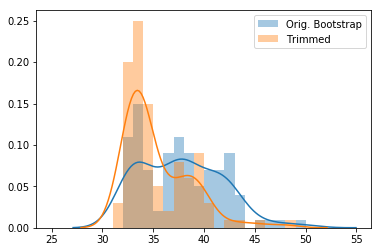

In [6]:
import seaborn as sns

bins = [x for x in range(25, 55)]

ax = sns.distplot(sample_means, bins, label='Orig. Bootstrap')
ax = sns.distplot(trimmed_means, bins, label='Trimmed')
ax.legend(loc='upper right')

Notice that we have less outlier data to the right.

# Your Turn 1

### Question:
------------------

 - Why do you think the above distributions are slightly multi-modal? (i.e., have multiple peaks?)
 
------------------

If you are unsure as to why there are multiple peaks to the right, try looking at individual bootstrap sets that happen to have very large means.

### Trimming More
Now let's look at what happens when we trim more than one point off the top and bottom.

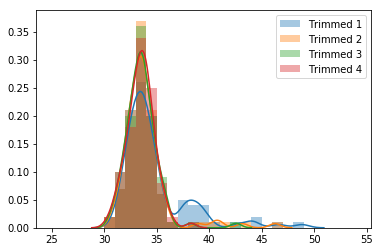

In [9]:
# Generate the different trimmed means
boot_trim1 = [trimmed_mean(x, 1) for x in boot_samples]
boot_trim2 = [trimmed_mean(x, 2) for x in boot_samples]
boot_trim3 = [trimmed_mean(x, 3) for x in boot_samples]
boot_trim4 = [trimmed_mean(x, 4) for x in boot_samples]

# Get each sample mean and st. dev.
trimmed_mean1 = [np.mean(x) for x in boot_trim1]
trimmed_stdev1 = [np.std(x) for x in boot_trim1]

trimmed_mean2 = [np.mean(x) for x in boot_trim2]
trimmed_stdev2 = [np.std(x) for x in boot_trim2]

trimmed_mean3 = [np.mean(x) for x in boot_trim3]
trimmed_stdev3 = [np.std(x) for x in boot_trim3]

trimmed_mean4 = [np.mean(x) for x in boot_trim4]
trimmed_stdev4 = [np.std(x) for x in boot_trim4]

# Plot the means
bins = [x for x in range(25, 55)]

ax = sns.distplot(trimmed_mean1, bins, label='Trimmed 1')
ax = sns.distplot(trimmed_mean2, bins, label='Trimmed 2')
ax = sns.distplot(trimmed_mean3, bins, label='Trimmed 3')
ax = sns.distplot(trimmed_mean4, bins, label='Trimmed 4')
ax.legend(loc='upper right')

This may be hard to see, but notice that we get less and less multi-modality as we trim more and more off from the sample.

------------
## Bootstrapping Regression

The bootstrap method can be applied to regression models. Bootstrapping a regression model gives insight on how variable the model parameters are. It is useful to know how much random variation there is in regression coefficients simply because of small changes in data values. 

As with most statistics, it is possible to bootstrap most any regression model. However, since bootstrap resampling uses a large number of subsamples, it can be computationally intensive. For large-scale problems it is necessary to using other resampling methods like cross-validation.

First we setup our data and fit the linear regression.

Intercept, x-Slope : Intercept    2.612317
x            1.026759
dtype: float64


Text(0.5, 1.0, 'x vs y')

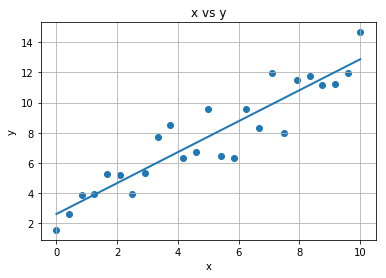

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

# Create sample data
n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
data_df = pd.DataFrame({'x': x, 'y': y})

ols_model = sm.ols(formula = 'y ~ x', data=data_df)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, x-Slope : {}'.format(results.params))

y_pred = results.predict()
# Plot result
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

### Resample Points (Parametric Bootstrap)

The first type of bootstrapping we will perform is resampling points. We'll use the pandas function `sample` to help with this process.

Text(0.5, 1.0, 'x vs y')

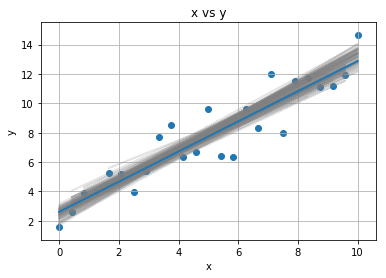

In [15]:
# Resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the rows, same size, with replacement
    sample_df = data_df.sample(n=n_points, replace=True)
    # Fit a linear regression
    ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
    results_temp = ols_model_temp.fit()
    
    # Get the intercept and slope, and record it
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    
    # Plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)

# Add points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

Notice the shape of the greyed bands.  They are more concentrated at the center than the edge.  This is because more points are positioned around the center than the edges.

Let's look at the distributions of the slope and intercepts.

In [ ]:
sns.distplot(boot_slopes)

In [ ]:
sns.distplot(boot_interc)

From these above plots and sets of data it is easy to determine a confidence interval for our linear regression parameters if need be.

# Your Turn 2

### Question:

From the above sets of 100 slopes and 100 intercepts, what would be a good 90% confidence interval for our slope and intercept?

In [ ]:
# Hint: think of sorting the slopes and intercepts first.

But our data is very nice here. If by chance we had sparse data, there may be a chance that our random selection of points are entirely in one area and not in another. To combat this, we can apply a different type of bootstrapping, called 'Non-Parametric Bootstrapping' in which we will apply bootstrapping on the residuals.

## Resample Residuals (Non-Parametric Bootstrapping)

The idea is that we want to observe a point at every x-position that we have a point in the original data. So we fit the original data and re-shuffle the residuals at every point. This should be fine because we are assuming that the errors are IID among our points.

In [ ]:
# Create sample data
n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
data_df = pd.DataFrame({'x': x, 'y': y})

# Fit linear regression model
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()

# Get predicted values
y_pred = results.predict(x)

# Get residual values
resids = results.resid

Now that we have the fitted values and residuals from our fit, we will generate N (100) new sets of data by sampling the residuals and adding them to the fitted values.

In [ ]:
boot2_slopes = []
boot2_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the residuals with replacement
    boot_resids = np.random.choice(resids, n_points, replace=True)
    y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
    
    sample_df = pd.DataFrame({'x': list(x), 'y': y_temp})
    # Fit a linear regression
    ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
    results_temp = ols_model_temp.fit()
    
    # Get the intercept and slope, and record it
    boot2_interc.append(results_temp.params[0])
    boot2_slopes.append(results_temp.params[1])
    
    # Plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)

# Add points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

Let's look again at the distributions of the parameters:

In [ ]:
sns.distplot(boot2_slopes)

In [ ]:
sns.distplot(boot2_interc)

Similarly, this gives us a handle on the error in our parameters with linear regression. In fact, this type of bootstrapping can be extended to most linear and non-linear models that have a unique optimal solution. This allows us to get a distribution of error for every parameter.

## Summary

In this notebook we looked at applying bootstrapping techniques to linear regression in two ways:

**Parametric bootstrapping** - resampling from all of the points:
1. Sample the data with replacement numerous times (100).
2. Fit a linear regression to each sample.
3. Store the intercept and slopes.
4. Plot a histogram of the parameters.


**Non-parametric boostrapping** - resampling on the residuals with an uneven distribution of feature values:
1. Find the optimal linear regression on all the original data.
2. Extract the residuals from the fit.
3. Create new y values using the residual samples.
4. Fit the linear regression with the new y values.
5. Store the slope and intercepts.
6. Plot a histogram of the parameters.

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>